In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report


In [2]:
## original dataframe
print("original dataframe")
filedata = r"C:\Users\umay2\Desktop\SUFFER\UNIV\SEMESTER 2\Metode Sains Data I\Tugas 3 MSD MLM\CourseraDataset-Clean_new.csv"
df = pd.read_csv(filedata)
print(df)

original dataframe
                                           Course Title  Rating  \
0                                     Fashion as Design     4.8   
1                                Modern American Poetry     4.4   
2                             Pixel Art for Video Games     4.5   
3       Distribución digital de la música independiente     0.0   
4     The Blues: Understanding and Performing an Ame...     4.8   
...                                                 ...     ...   
8365  Architecting with Google Kubernetes Engine: Pr...     4.9   
8366  Computational Thinking for K-12 Educators: Nes...     0.0   
8367           Cómo combinar y analizar datos complejos     0.0   
8368  Architecting with Google Kubernetes Engine: Wo...     0.0   
8369                 Visualizing static networks with R     0.0   

                   Level           Schedule  \
0         Beginner level  Flexible schedule   
1         Beginner level  Flexible schedule   
2         Beginner level  Flexible 

In [3]:
## deskripsi dataframe numerik
print('')
print("deskripsi dataframe numerik:")
df_numerik = df.drop(columns=["Course Title", "Level", "Schedule", "What you will learn", "Skill gain"], axis=0)
maindata = df_numerik.describe()
print(maindata)


deskripsi dataframe numerik:
            Rating  Duration to complete (Approx.)  Number of Review
count  8370.000000                     8370.000000       8370.000000
mean      4.005974                       29.245968       2044.256631
std       1.623430                       39.899608      10265.366839
min       0.000000                        1.000000          0.000000
25%       4.500000                       10.000000         32.000000
50%       4.700000                       16.000000        213.000000
75%       4.800000                       32.000000       1025.000000
max       5.000000                      480.000000     225830.000000


In [4]:
#definisikan variabel prediktor
pcollums = ['Duration to complete (Approx.)', 'Number of Review']
#ubah menjadi float
x = df[pcollums].astype(int)
x.head(2)


,Duration to complete (Approx.),Number of Review
0,20,2813
1,34,100


In [5]:
#definisikan variabel respon/convert ke int cause idk
rcollums = ['Rating']
y= df[rcollums].astype(int)
y.head(2)

,Rating
0,4
1,4


In [6]:
#training data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [7]:
#fitting training data ke model
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
#prediksi dan score accuracy
y_pred= clf.predict(x_test)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))


accuracy: 0.965352449223417


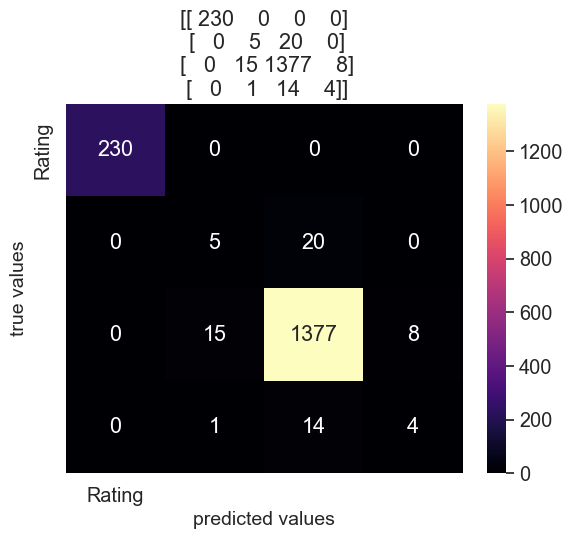

<Figure size 1000x700 with 0 Axes>

In [9]:
#evaluasi
#matrix antara nilai asli y dan prediksi 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix= pd.DataFrame(confusion_matrix)
#bentuk heatmap
sns.set(font_scale=1.3)
axis=plt.axes()
plt.figure(figsize= (10,7))
#titles
axis.set_title(confusion_matrix)
sns.heatmap(matrix, annot= True, fmt="g",ax=axis, xticklabels=rcollums, yticklabels=rcollums, cmap="magma")
axis.set_xlabel("predicted values", fontsize= 14)
axis.set_ylabel("true values", fontsize= 14)
plt.show()


In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           3       0.24      0.20      0.22        25
           4       0.98      0.98      0.98      1400
           5       0.33      0.21      0.26        19

    accuracy                           0.97      1674
   macro avg       0.64      0.60      0.61      1674
weighted avg       0.96      0.97      0.96      1674

